# Classification Project


---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**

---
<a href=#one></a>
## 1. **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [2]:
# Data handling and manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Ignore warnings for cleaner outputs
import warnings
warnings.filterwarnings('ignore')


---
<a href=#two></a>
## 2. **Data Collection and Description**



---
<a href=#three></a>
## 3. **Loading Data**


* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [11]:
# Load datasets
train_data = pd.read_csv('C:/Users/F8871718/OneDrive - FRG/Downloads/Data Classification/train.csv')
test_data = pd.read_csv('C:/Users/F8871718/OneDrive - FRG/Downloads/Data Classification/test.csv')

# Displaying basic information and the first few rows of each dataset
train_info = train_data.info()
train_head = train_data.head()
test_info = test_data.info()
test_head = test_data.head()

train_info, train_head, test_info, test_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    5520 non-null   object
 1   description  5520 non-null   object
 2   content      5520 non-null   object
 3   url          5520 non-null   object
 4   category     5520 non-null   object
dtypes: object(5)
memory usage: 215.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    2000 non-null   object
 1   description  2000 non-null   object
 2   content      2000 non-null   object
 3   url          2000 non-null   object
 4   category     2000 non-null   object
dtypes: object(5)
memory usage: 78.3+ KB


(None,
                                            headlines  \
 0  RBI revises definition of politically-exposed ...   
 1  NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...   
 2  Akasa Air ‘well capitalised’, can grow much fa...   
 3  India’s current account deficit declines sharp...   
 4  States borrowing cost soars to 7.68%, highest ...   
 
                                          description  \
 0  The central bank has also asked chairpersons a...   
 1  NDTV's consolidated revenue from operations wa...   
 2  The initial share sale will be open for public...   
 3  The current account deficit (CAD) was 3.8 per ...   
 4  The prices shot up reflecting the overall high...   
 
                                              content  \
 0  The Reserve Bank of India (RBI) has changed th...   
 1  Broadcaster New Delhi Television Ltd on Monday...   
 2  Homegrown server maker Netweb Technologies Ind...   
 3  India’s current account deficit declined sharp...   
 4  States have been

## 4. Data Cleaning <a class="anchor" id="chapter4"></a>

In [12]:
# Checking for duplicates and missing values in both datasets

# Duplicate rows count
train_duplicates = train_data.duplicated().sum()
test_duplicates = test_data.duplicated().sum()

# Missing values count
train_missing = train_data.isnull().sum()
test_missing = test_data.isnull().sum()

train_duplicates, train_missing, test_duplicates, test_missing


(0,
 headlines      0
 description    0
 content        0
 url            0
 category       0
 dtype: int64,
 0,
 headlines      0
 description    0
 content        0
 url            0
 category       0
 dtype: int64)

## 5. Exploratory Data Analysis (EDA) <a class="anchor" id="chapter5"></a>

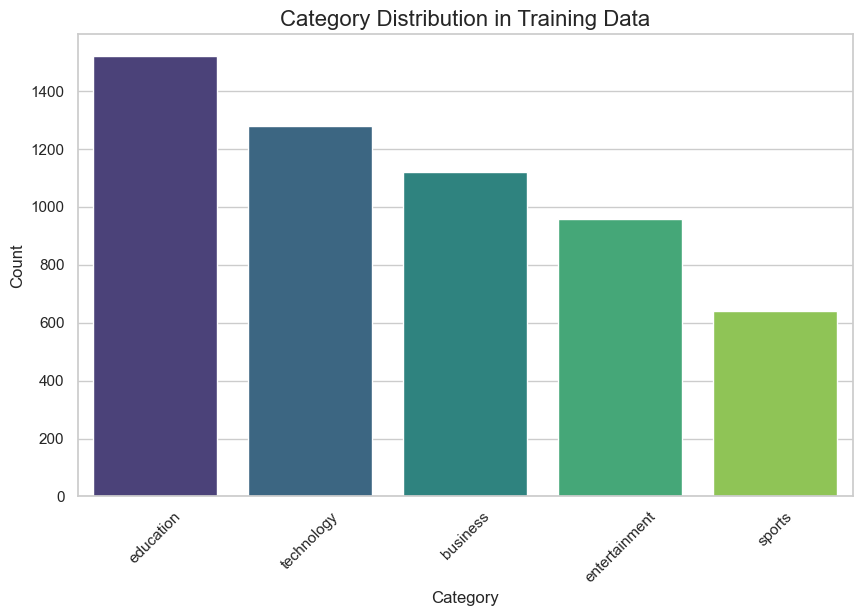

(count    5520.000000
 mean       13.527355
 std         4.234045
 min         4.000000
 25%        11.000000
 50%        13.000000
 75%        16.000000
 max        30.000000
 Name: headline_word_count, dtype: float64,
 count    5520.000000
 mean       26.275000
 std         8.480353
 min         3.000000
 25%        20.000000
 50%        25.000000
 75%        32.000000
 max        71.000000
 Name: description_word_count, dtype: float64,
 count    5520.000000
 mean      215.106703
 std       203.041812
 min        30.000000
 25%       101.000000
 50%       137.000000
 75%       243.000000
 max      2644.000000
 Name: content_word_count, dtype: float64)

In [13]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Setting a style for visualizations
sns.set(style="whitegrid")

# Category distribution in the training dataset
category_distribution = train_data['category'].value_counts()

# Plotting the category distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=category_distribution.index, y=category_distribution.values, palette='viridis')
plt.title("Category Distribution in Training Data", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Calculating average word counts in 'headlines', 'description', and 'content'
train_data['headline_word_count'] = train_data['headlines'].apply(lambda x: len(x.split()))
train_data['description_word_count'] = train_data['description'].apply(lambda x: len(x.split()))
train_data['content_word_count'] = train_data['content'].apply(lambda x: len(x.split()))

# Summary statistics for word counts
headline_stats = train_data['headline_word_count'].describe()
description_stats = train_data['description_word_count'].describe()
content_stats = train_data['content_word_count'].describe()

headline_stats, description_stats, content_stats


## 6. Feature Engineering

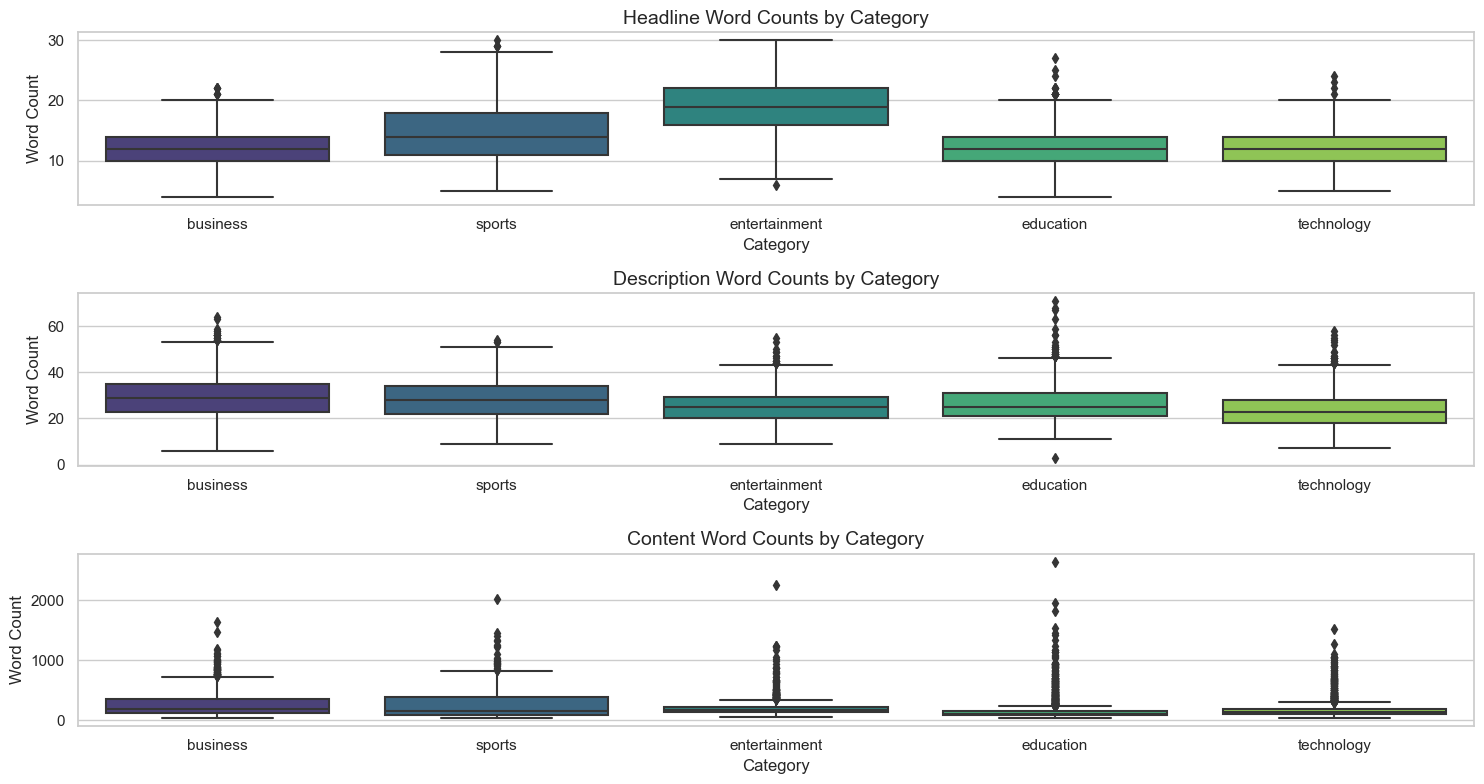

In [14]:
# Visualizing the relationship between categories and text length for headlines, descriptions, and content

# Plotting boxplots for word counts by category
plt.figure(figsize=(15, 8))

# Subplot 1: Headline word counts
plt.subplot(3, 1, 1)
sns.boxplot(data=train_data, x='category', y='headline_word_count', palette='viridis')
plt.title('Headline Word Counts by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Word Count', fontsize=12)

# Subplot 2: Description word counts
plt.subplot(3, 1, 2)
sns.boxplot(data=train_data, x='category', y='description_word_count', palette='viridis')
plt.title('Description Word Counts by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Word Count', fontsize=12)

# Subplot 3: Content word counts
plt.subplot(3, 1, 3)
sns.boxplot(data=train_data, x='category', y='content_word_count', palette='viridis')
plt.title('Content Word Counts by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Word Count', fontsize=12)

plt.tight_layout()
plt.show()
